# Trabajo práctico especial
A continuación se muestran los ejercicios del trabajo práctico especial

## Configuración inicial

Importamos las librerías y funciones necesarias.

In [1]:
from input.letters import letters
from scipy.io import wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtp

Configuración de matplotlib para mostrar los gráficos inline.

In [2]:
%matplotlib inline

mtp.rcParams['figure.figsize'] = (10,4)
mtp.rcParams['figure.dpi'] = 300

## Ejercicio 1

Importamos el archivo de audio y lo graficamos, mostrando la posición de cada letra en la señal

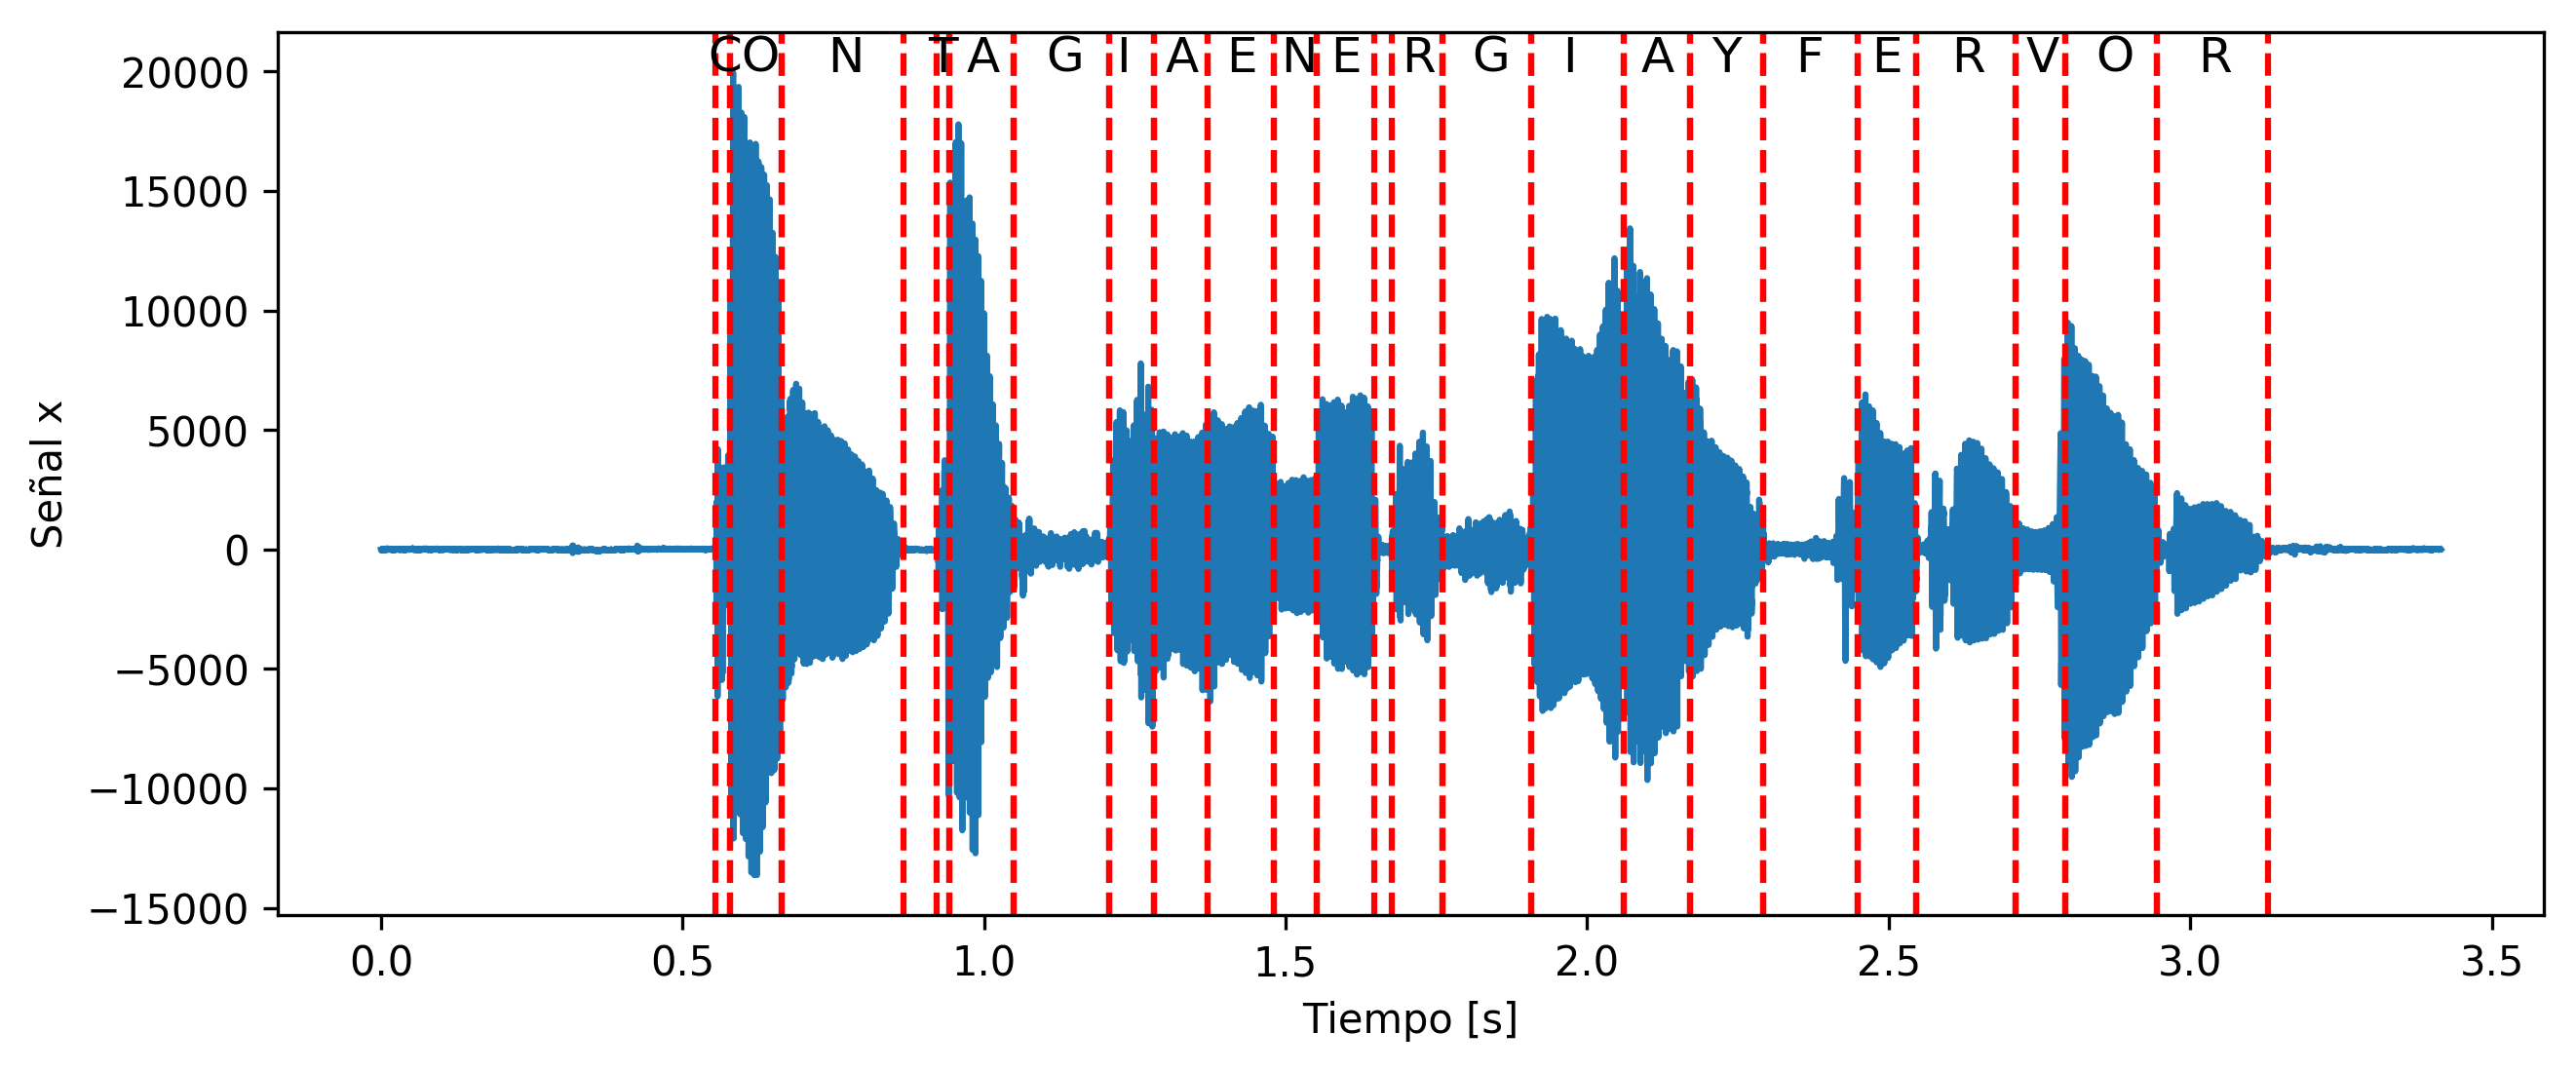

In [3]:
(fs, x) = wav.read("data/hh15.WAV")
t = np.arange(0, len(x) / fs, 1 / fs)
plt.plot(t, x)
plt.xlabel("Tiempo [s]")
plt.ylabel("Señal x")
for letter in letters:
    offset = 0.025
    letter_x = (letter.start + letter.end) / 2 - offset
    letter_y = 20000
    plt.text(letter_x , letter_y, letter.char, fontsize=12)
    plt.axvline(x=letter.start, color='r', linestyle='dashed')
    plt.axvline(x=letter.end, color='r', linestyle='dashed')
plt.show()


## Ejercicio 2

Obtenemos un periodo de la segunda 'A' de contagia y lo graficamos

Period start value:	 -1048
Period end value:	 -948


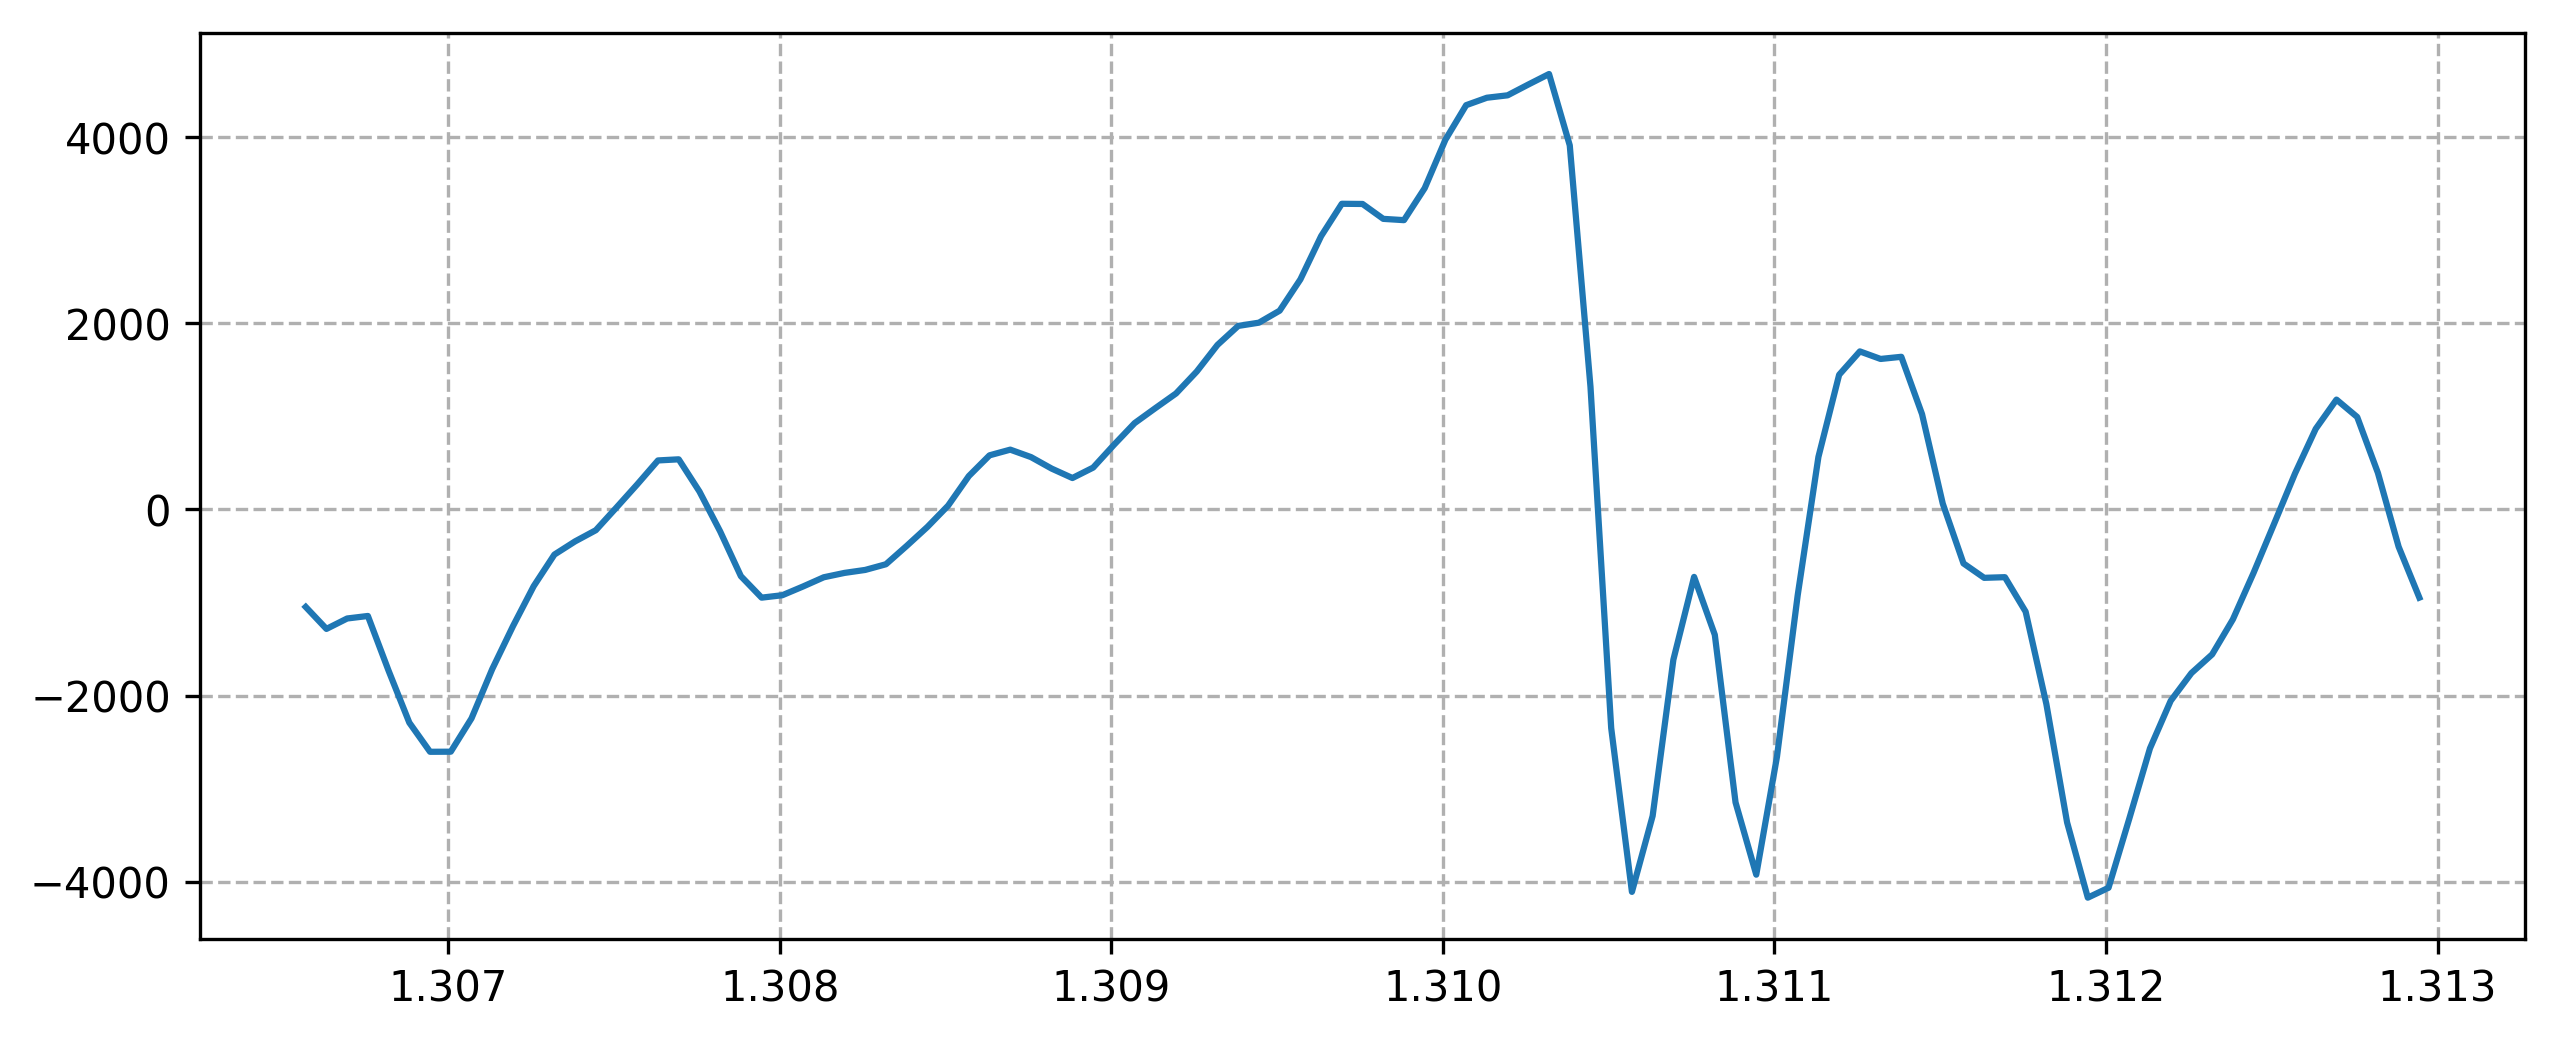

In [4]:
period_start = 1.30657
period_end = 1.313

# Preiodo de una 'O' para comparar
# period_start = 0.61375
# period_end = 0.6185

x_a = x[int(period_start * fs): int(period_end * fs)]
t_a = np.arange(0, len(x_a) / fs, 1 / fs) + period_start

print('Period start value:\t', x_a[0])
print('Period end value:\t', x_a[len(x_a) - 1])

plt.grid(linestyle='dashed')
plt.plot(t_a, x_a)
plt.show()

Calculamos los coeficientes de Fourier del periodo de la 'A' obtenido previamente, y graficamos el módulo de los coeficientes.

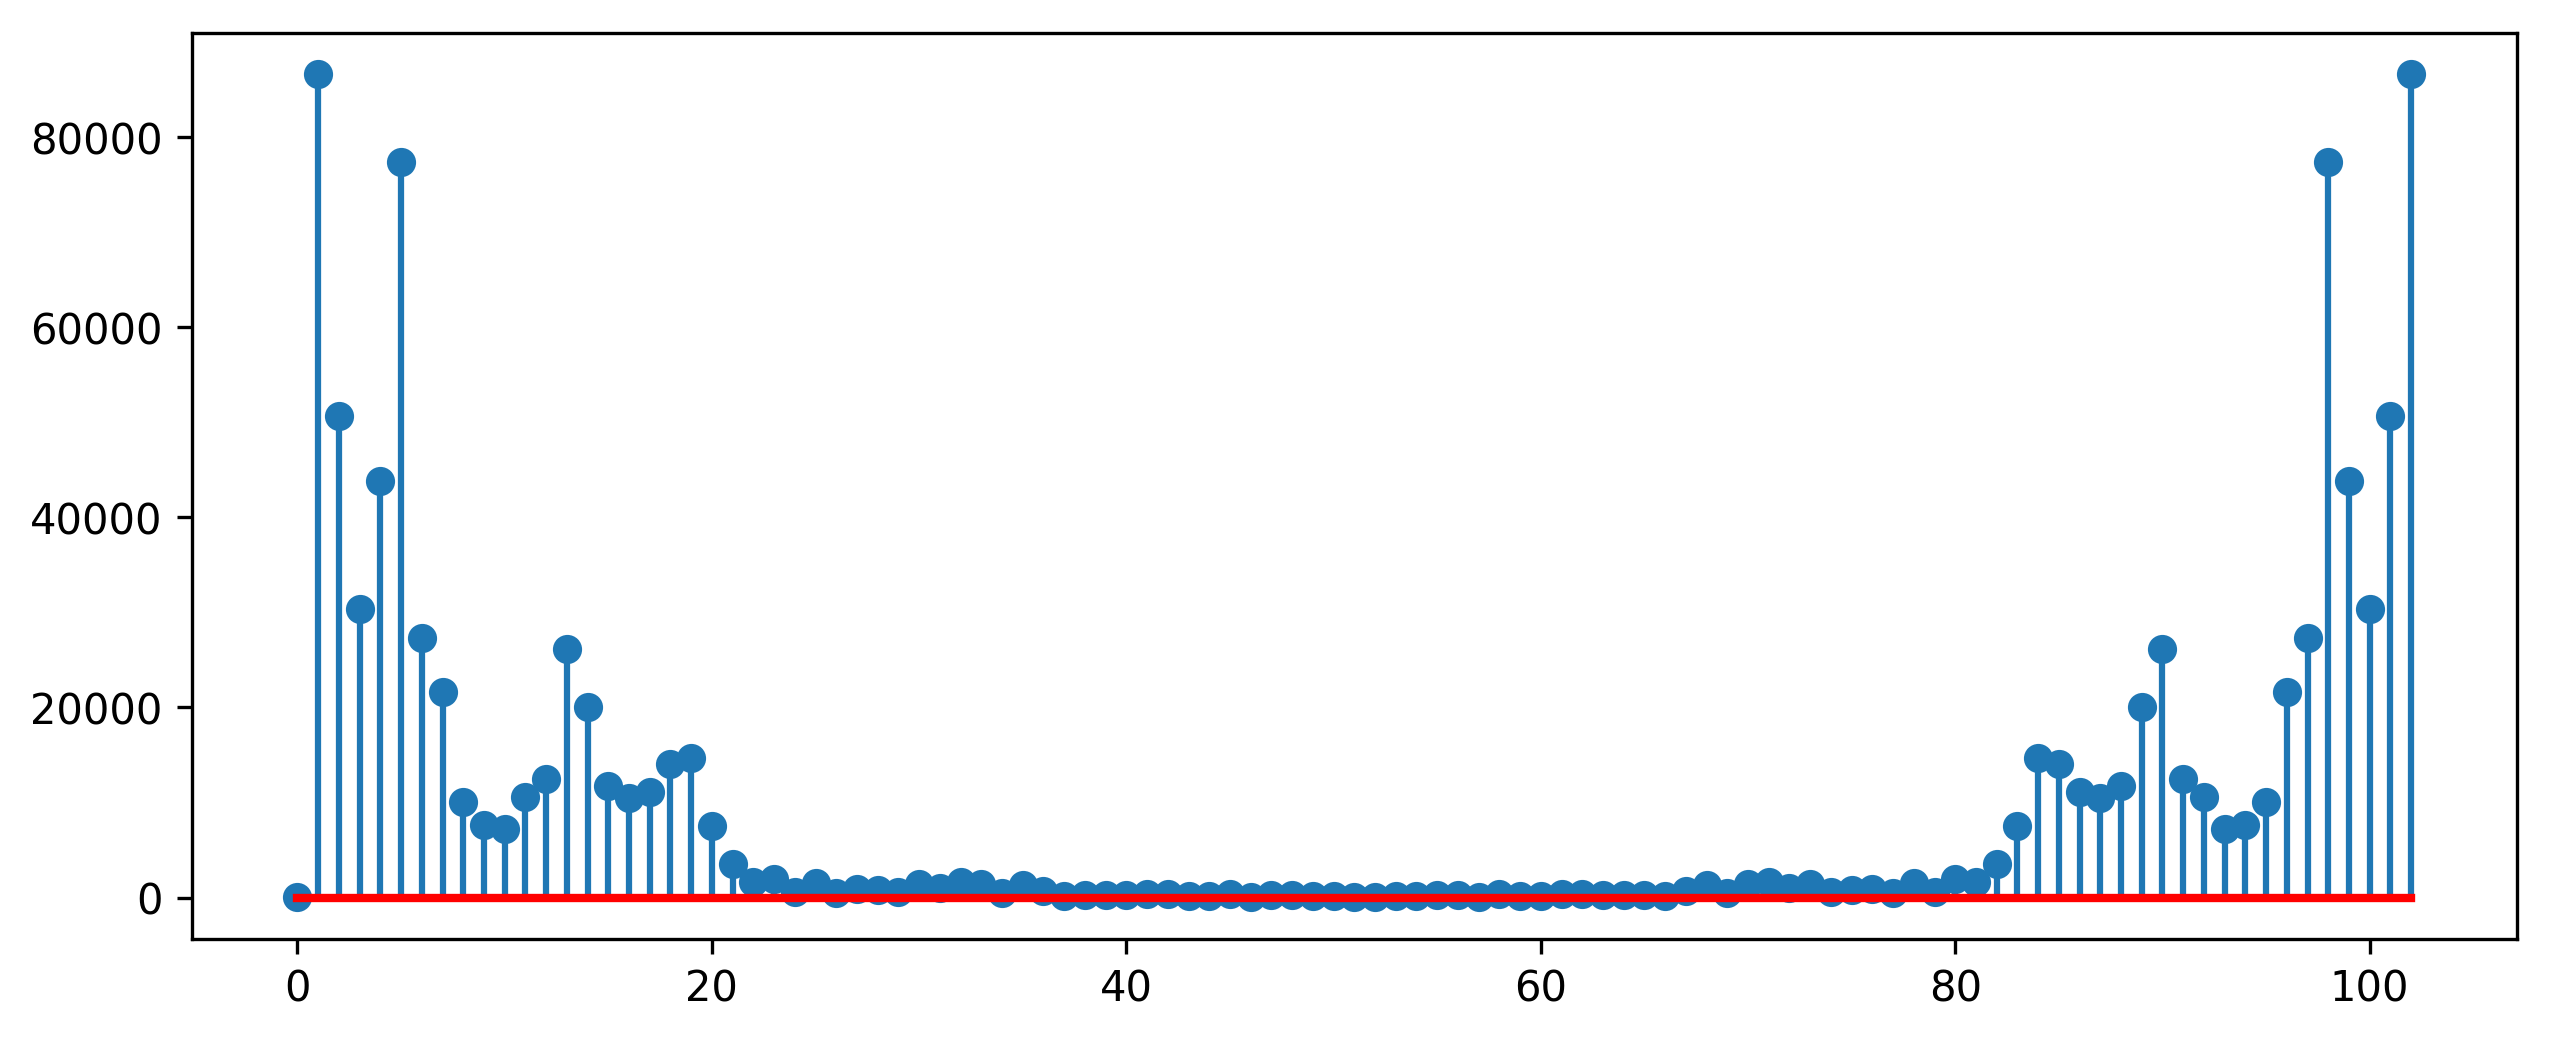

In [5]:
X_a = np.fft.fft(x_a)
X_a_mod = np.absolute(X_a)
markerline, stemlines, baseline = plt.stem(X_a_mod)
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.show()

In [6]:
# TODO Hacer lo mismo con varios periodos

## Ejercicio 3

Reconstruimos la señal de la 'A' a partir de sus coeficientes de Fourier

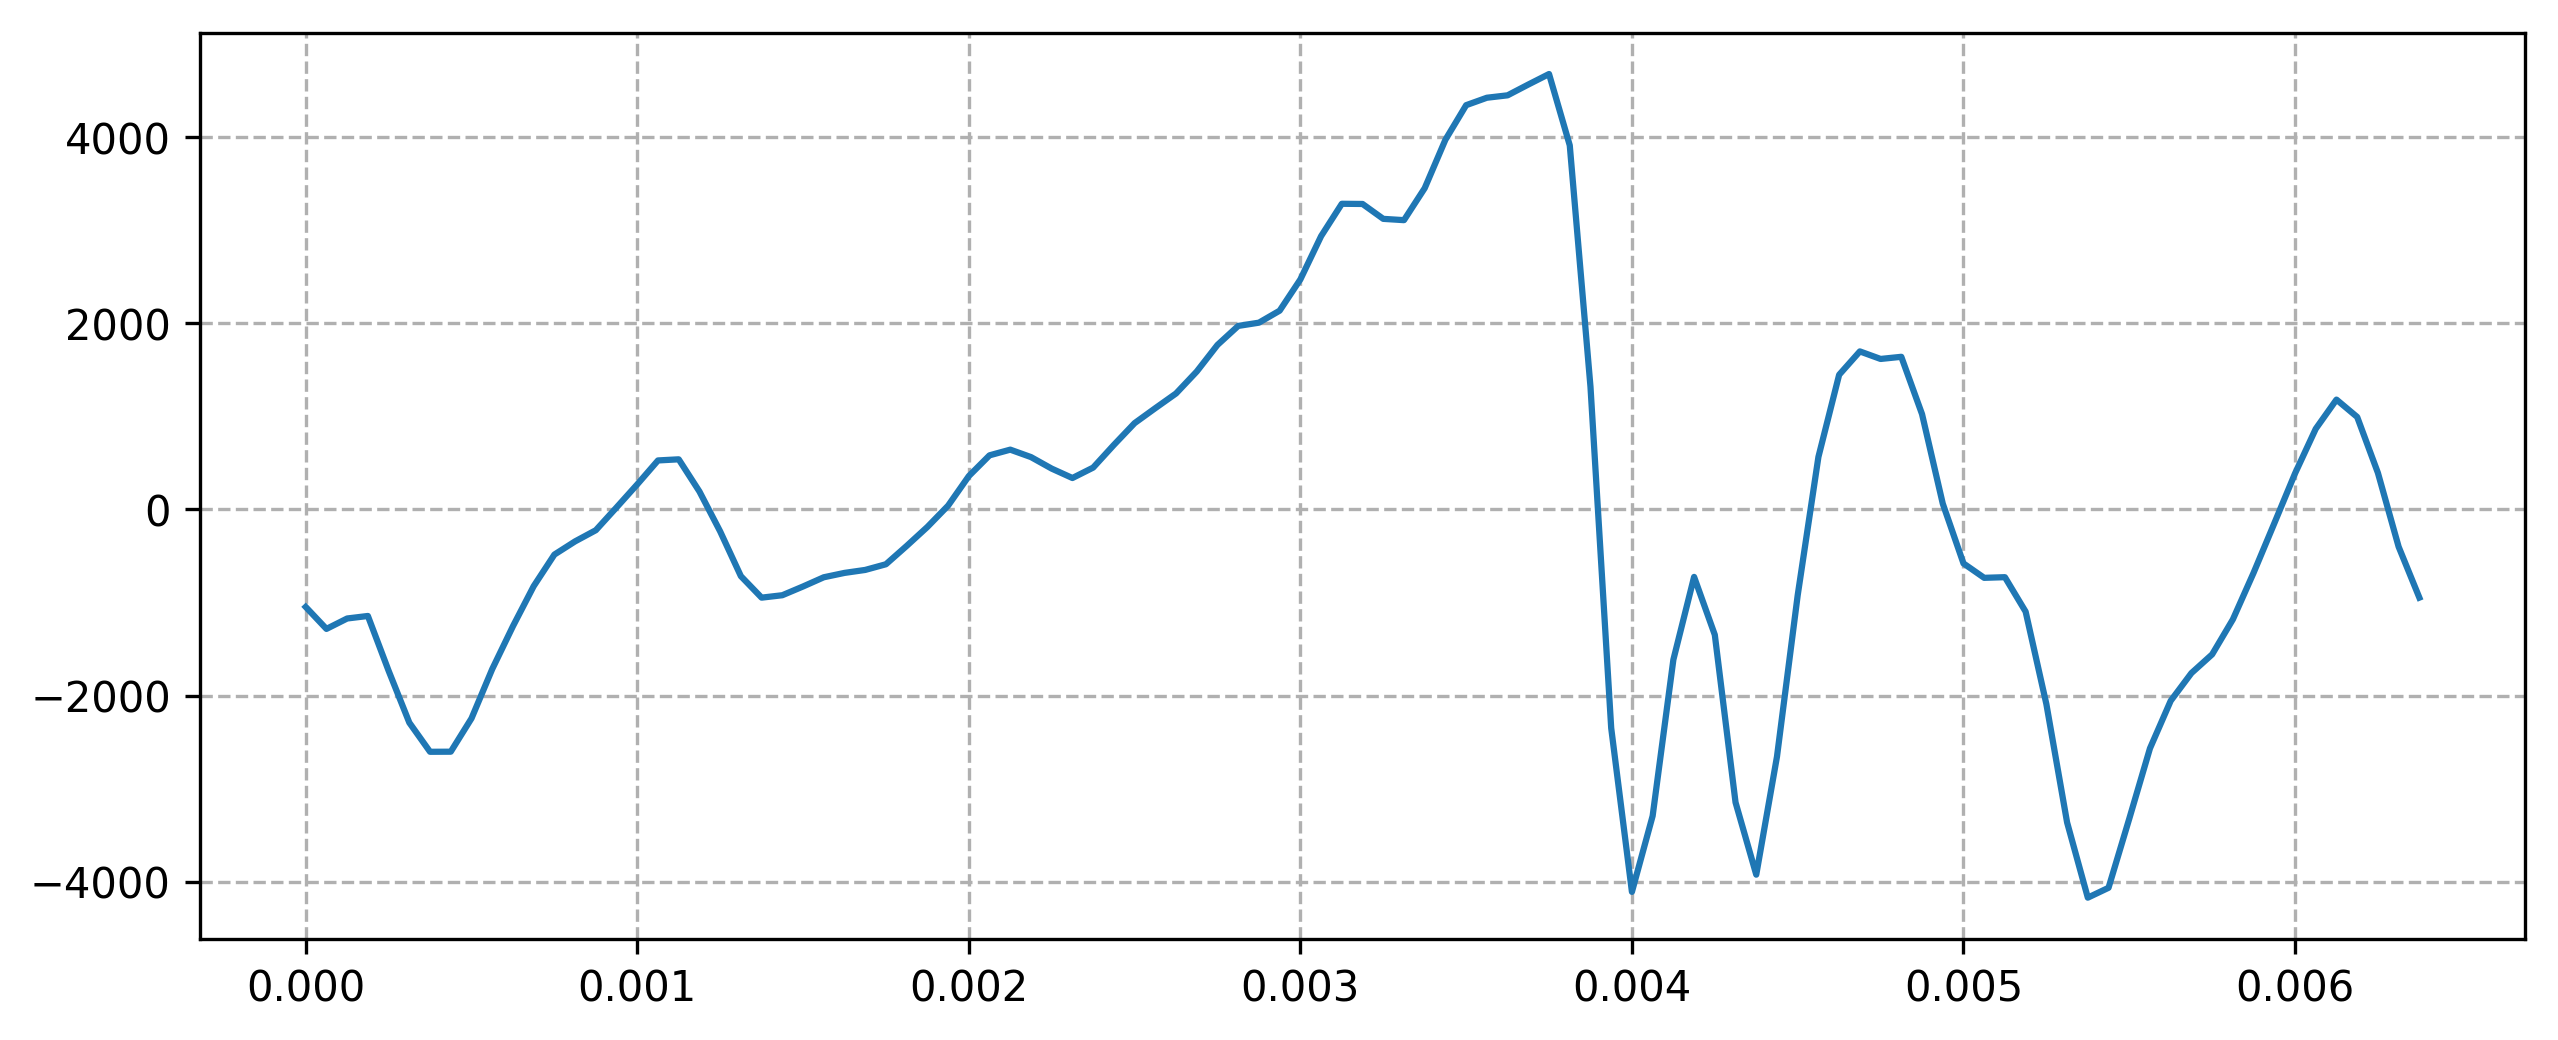

In [7]:
x_a_rebuilt = np.fft.ifft(X_a)
x_a_rebuilt_real = np.real(x_a_rebuilt)
plt.grid(linestyle='dashed')
plt.plot(np.arange(len(x_a_rebuilt_real)) / fs, x_a_rebuilt_real)
plt.show()

Periodizamos la señal reconstruida, y generamos un audio con dicha señal

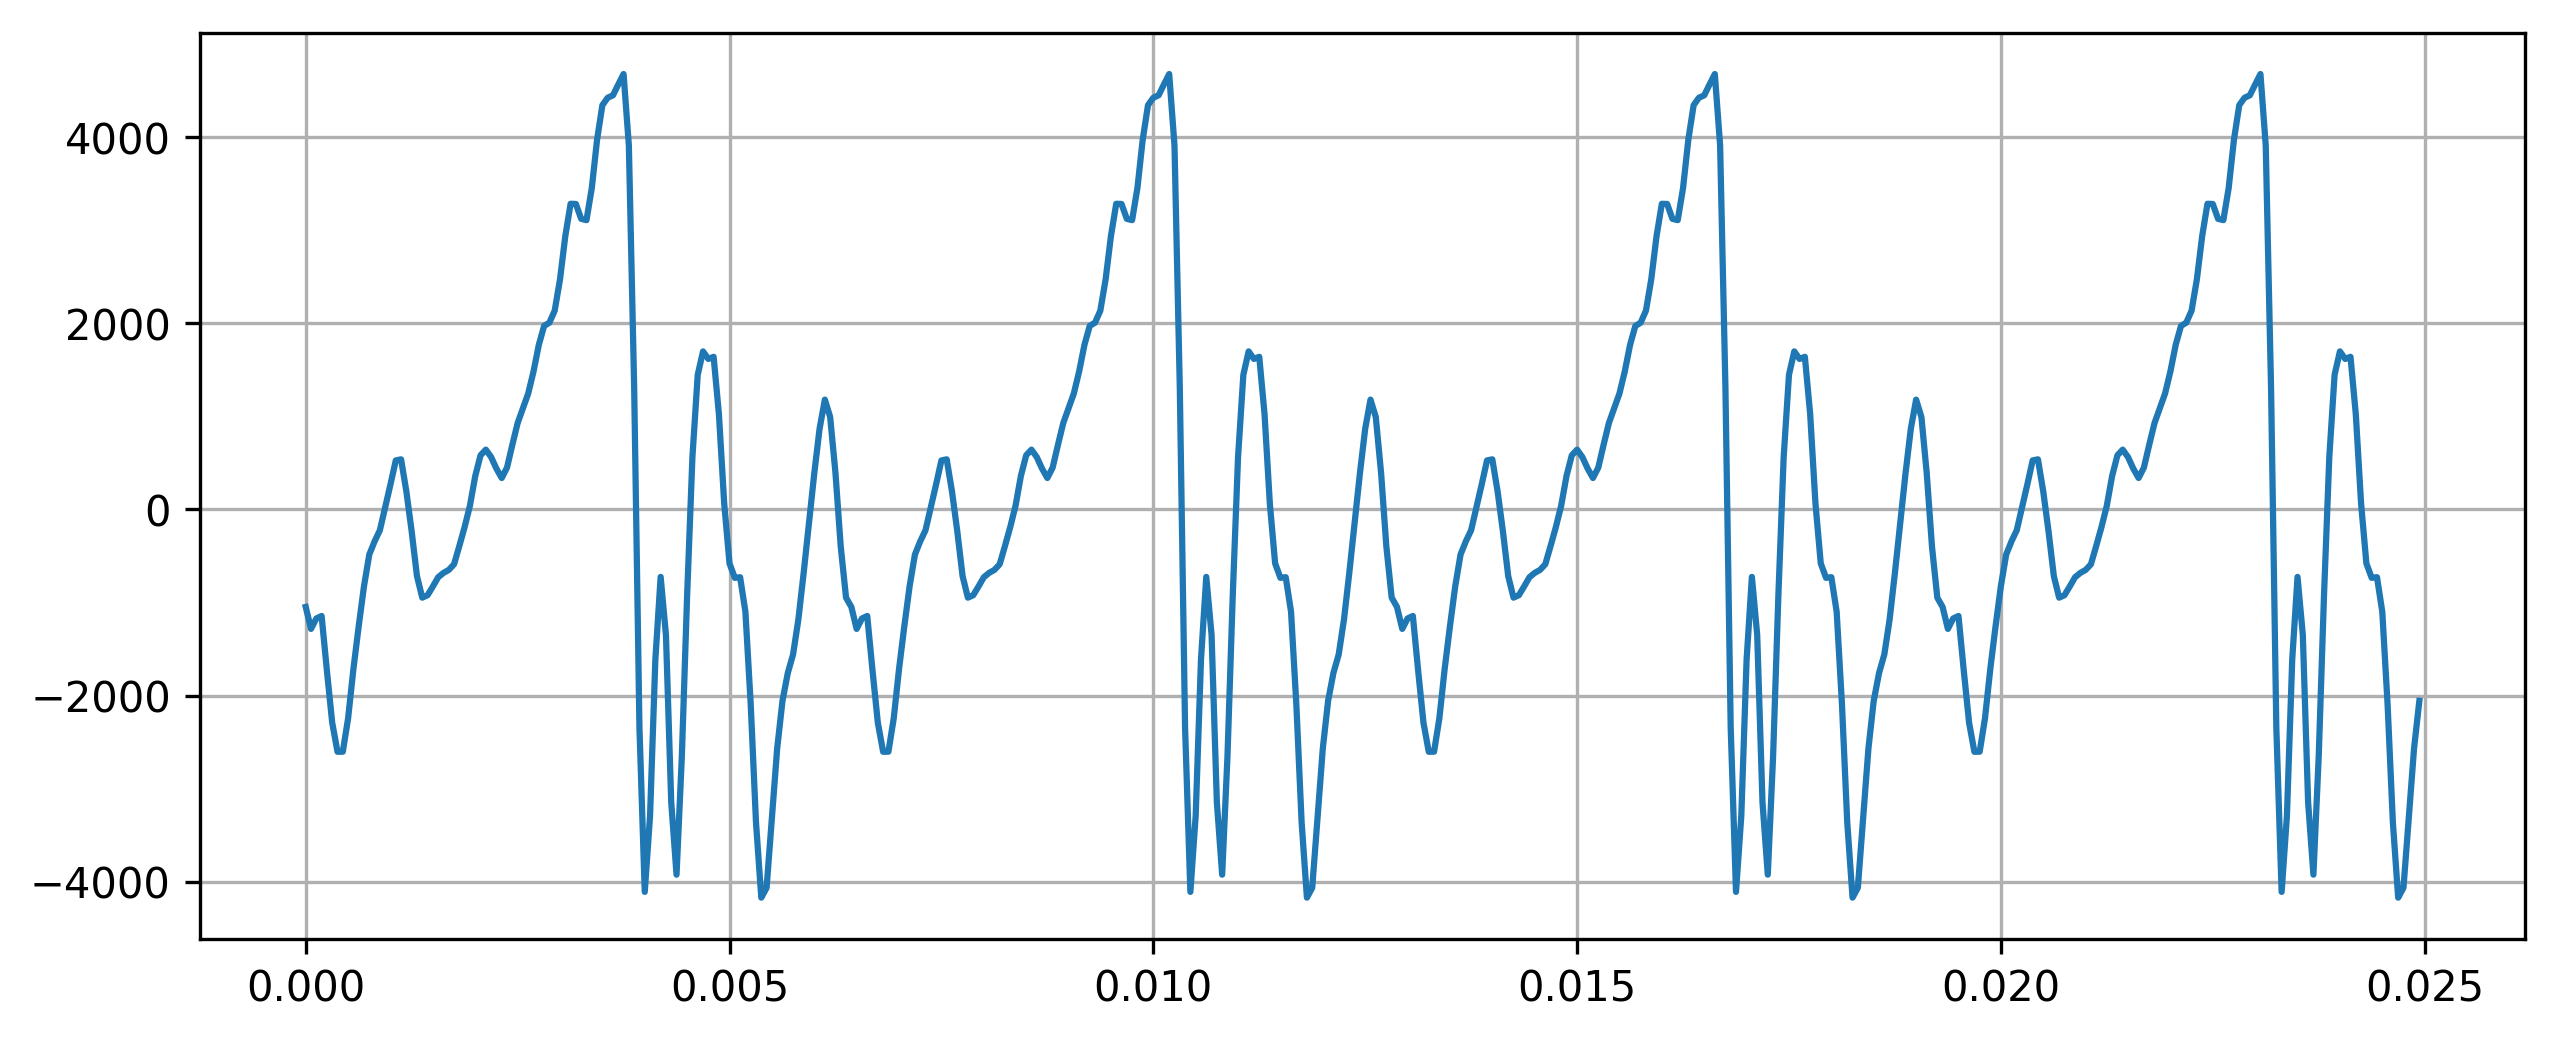

In [8]:
a_signal = np.squeeze(np.tile(x_a_rebuilt_real, [1,500]))
plt.grid()
plt.plot(np.arange(400) / fs, a_signal[:400])
plt.show()
wav.write("data/a.wav", fs, a_signal)

## Ejercicio 3 bis

Ahora probamos reconstruir la señal a partir de los coeficientes de Fourier, pero pasando a cero los coeficientes menores a cierto umbral

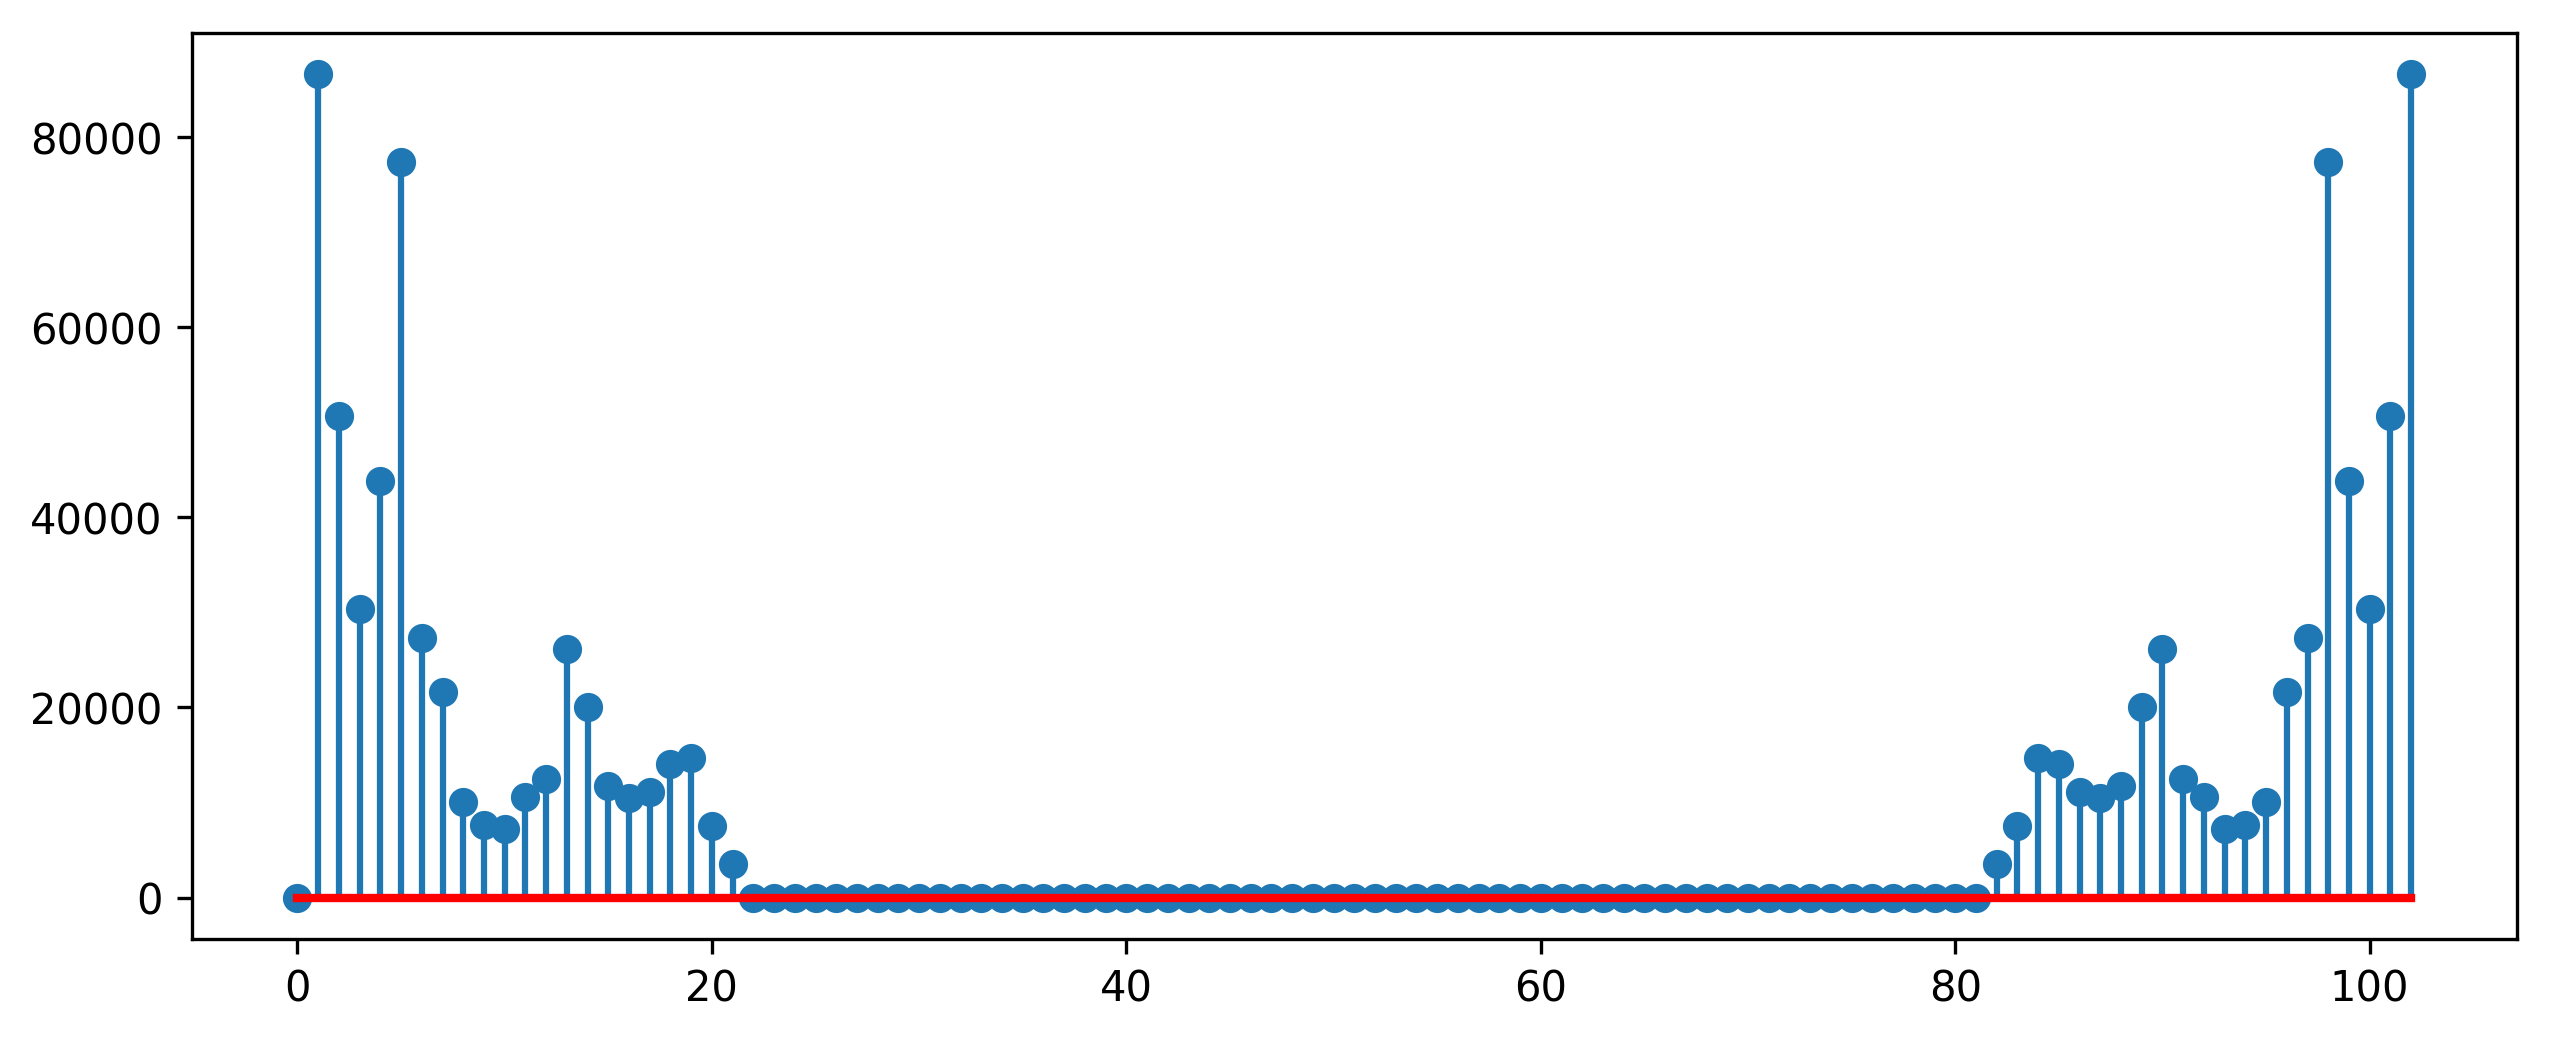

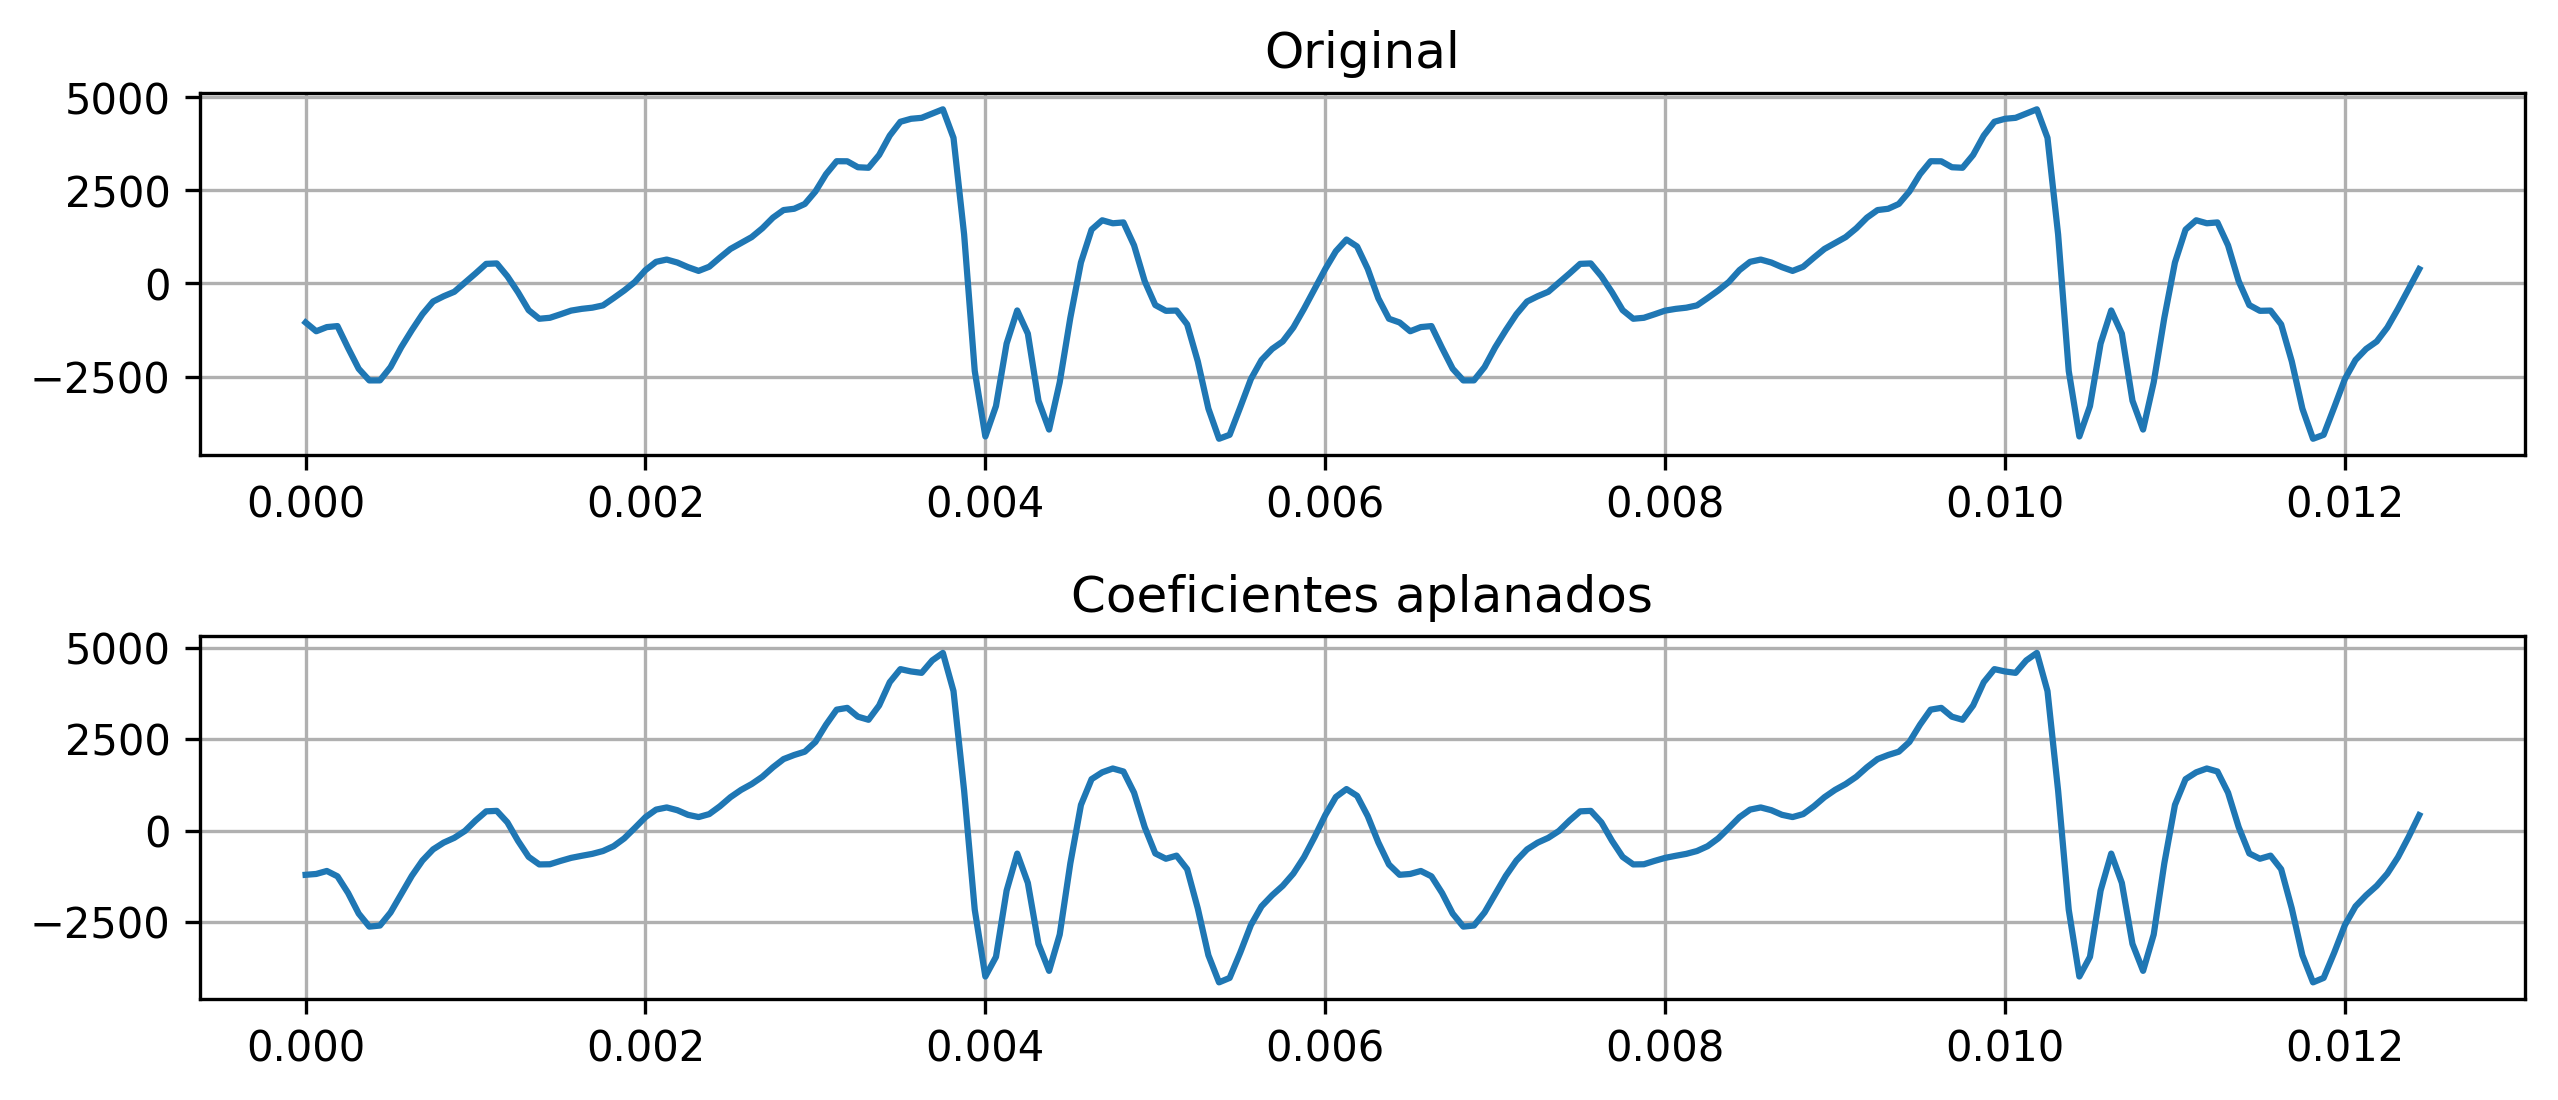

In [10]:
threshold = 3000
X_a[X_a_mod < threshold] = 0
markerline, stemlines, baseline = plt.stem(np.absolute(X_a))
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.show()

x_a_rebuilt_flat = np.fft.ifft(X_a)
x_a_rebuilt_flat_real = np.real(x_a_rebuilt_flat)
a_signal_flat = np.squeeze(np.tile(x_a_rebuilt_flat_real, [1,500]))

t = np.arange(200) / fs

plt.subplot(2,1,1)
plt.plot(t, a_signal[:200])
plt.title('Original')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, a_signal_flat[:200])
plt.title('Coeficientes aplanados')
plt.grid()

plt.subplots_adjust(hspace=0.5)


plt.show()
wav.write("data/a_flat.wav", fs, a_signal_flat)